# Problem 1
## Context
### CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

## Objective
### The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

## *Data Description
#### *vote: Party choice: Conservative or Labour
#### *age: in years
#### *economic.cond.national: Assessment of current national economic conditions, 1 to 5.
#### *economic.cond.household: Assessment of current household economic conditions, 1 to 5.
#### *Blair: Assessment of the Labour leader, 1 to 5.
#### *Hague: Assessment of the Conservative leader, 1 to 5.
#### *Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
#### *political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
#### *gender: female or male.

In [312]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


In [314]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')  

In [316]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [318]:
df.shape

(1525, 10)

In [320]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [322]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [324]:
print(df.isnull().sum())

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


## Univariate Analysis

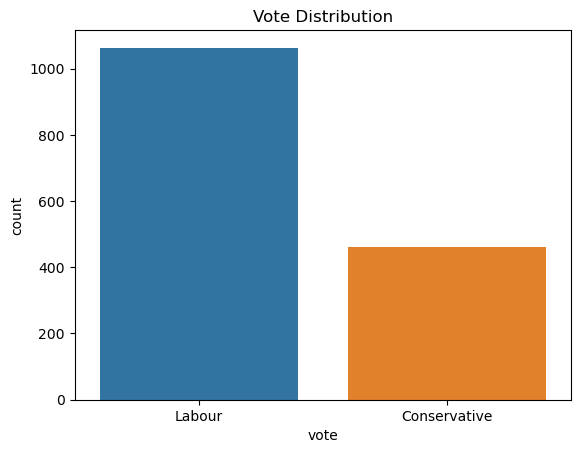

In [327]:
sns.countplot(x='vote', data=df)
plt.title('Vote Distribution')
plt.show()

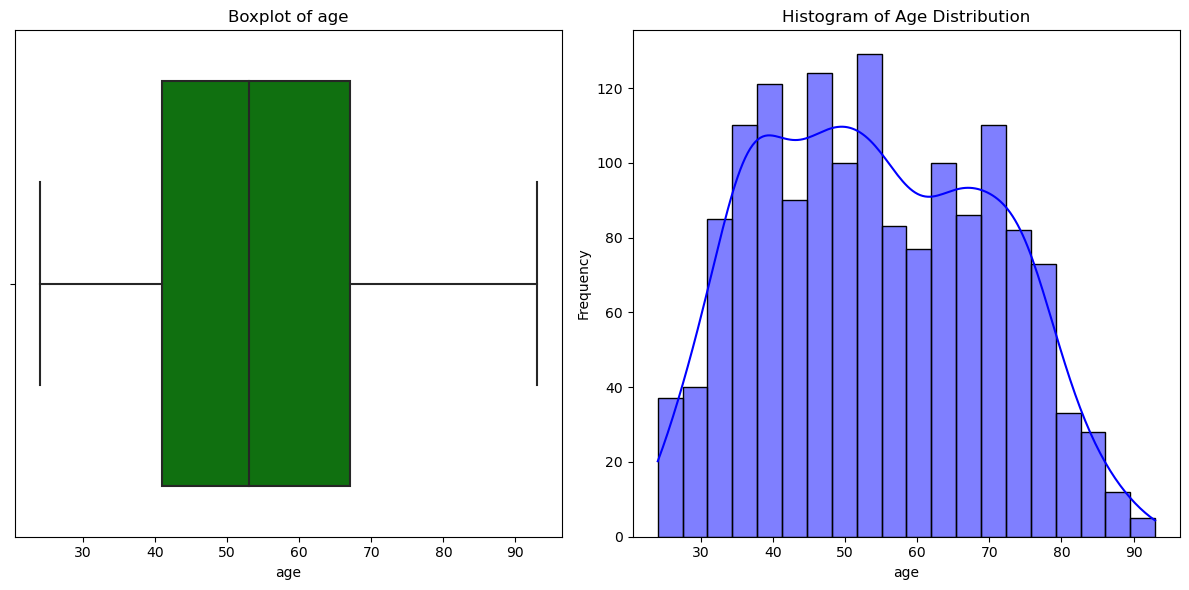

In [329]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='age', color='green', ax=display[0])
display[0].set_title('Boxplot of age')
display[0].set_xlabel('age')

sns.histplot(df['age'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Age Distribution')
display[1].set_xlabel('age')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

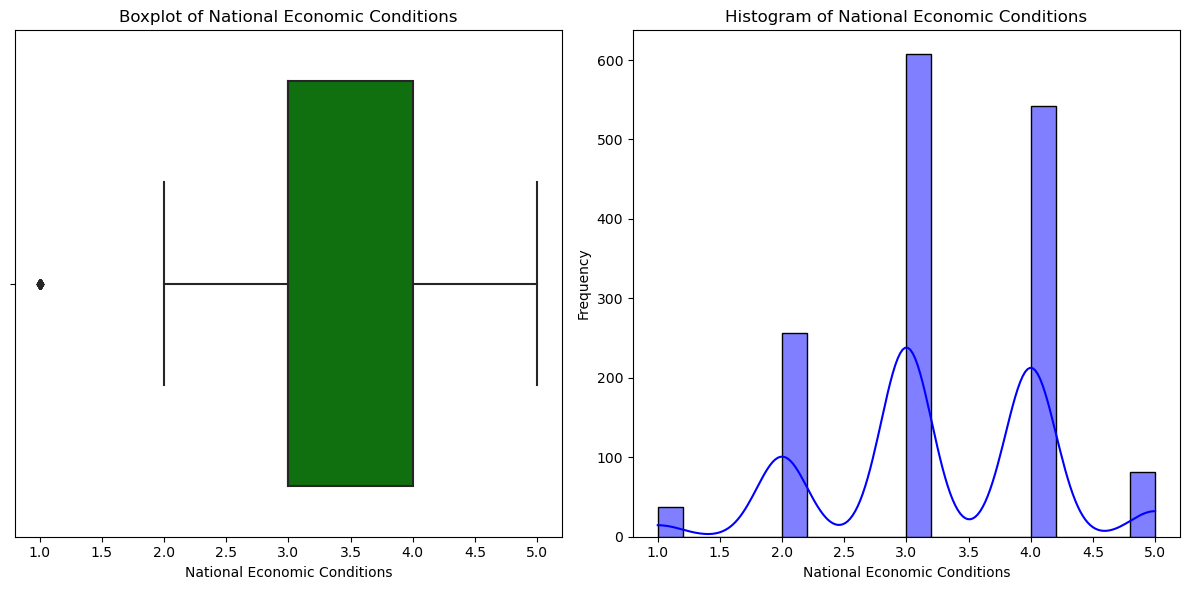

In [331]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='economic.cond.national', color='green', ax=display[0])
display[0].set_title('Boxplot of National Economic Conditions')
display[0].set_xlabel('National Economic Conditions')

sns.histplot(df['economic.cond.national'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of National Economic Conditions')
display[1].set_xlabel('National Economic Conditions')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

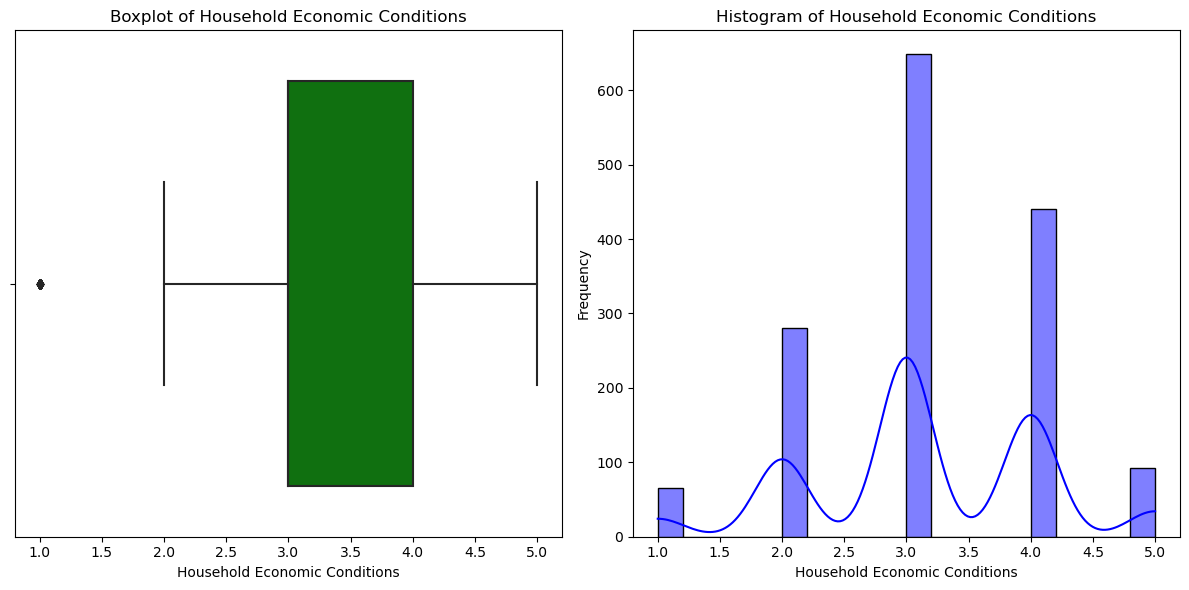

In [333]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='economic.cond.household', color='green', ax=display[0])
display[0].set_title('Boxplot of Household Economic Conditions')
display[0].set_xlabel('Household Economic Conditions')

sns.histplot(df['economic.cond.household'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Household Economic Conditions')
display[1].set_xlabel('Household Economic Conditions')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

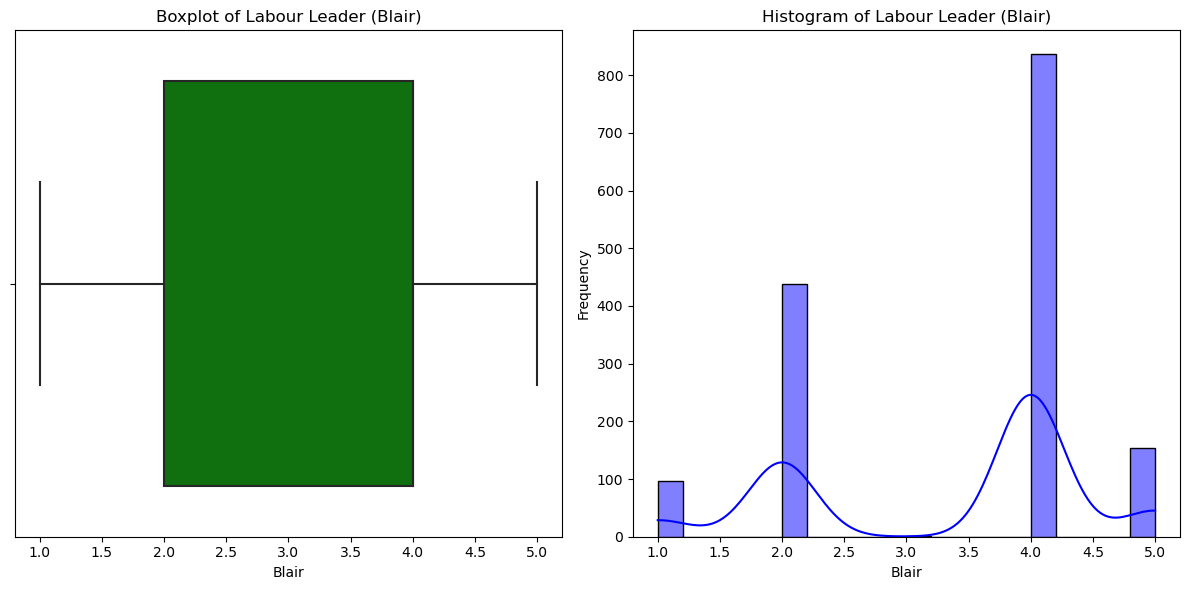

In [335]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Blair', color='green', ax=display[0])
display[0].set_title('Boxplot of Labour Leader (Blair)')
display[0].set_xlabel('Blair')

sns.histplot(df['Blair'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Labour Leader (Blair)')
display[1].set_xlabel('Blair')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

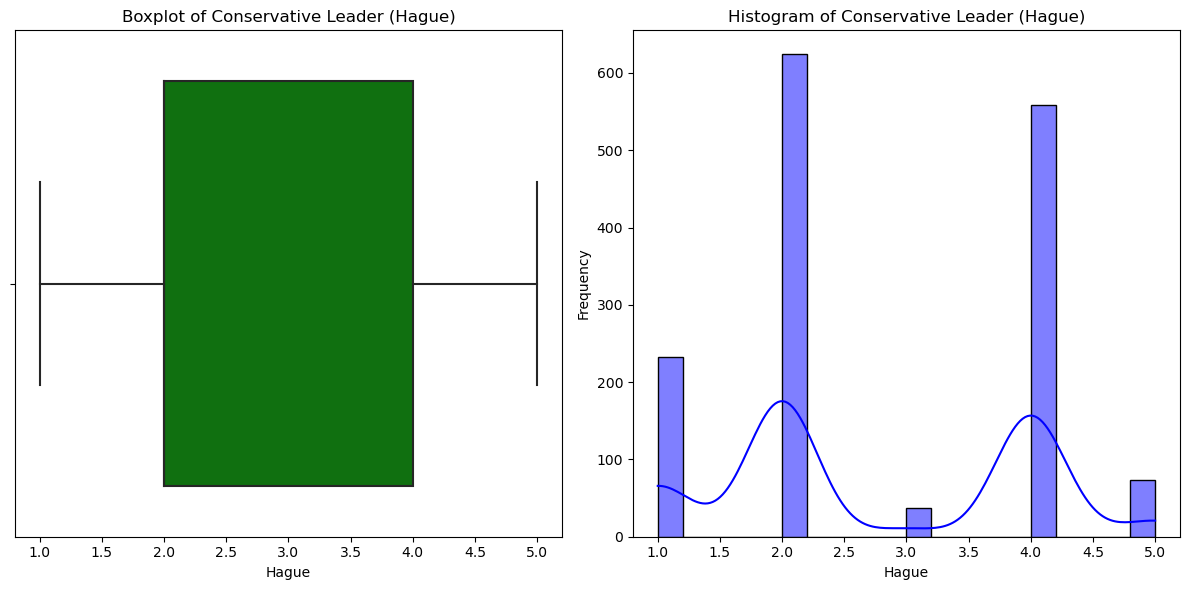

In [337]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Hague', color='green', ax=display[0])
display[0].set_title('Boxplot of Conservative Leader (Hague)')
display[0].set_xlabel('Hague')

sns.histplot(df['Hague'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Conservative Leader (Hague)')
display[1].set_xlabel('Hague')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

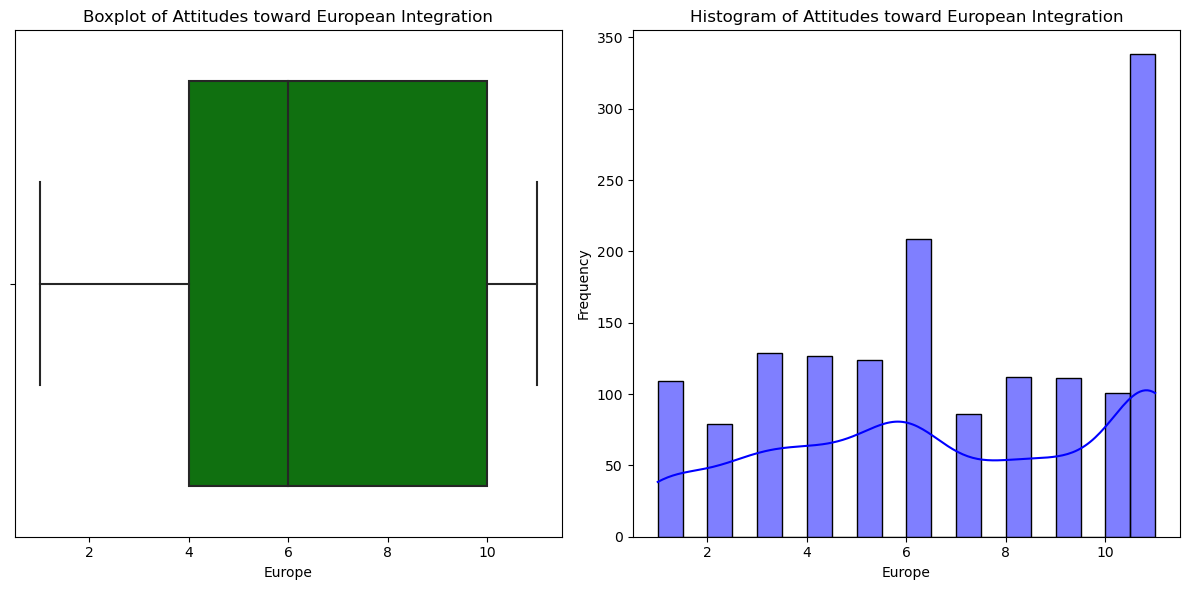

In [338]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Europe', color='green', ax=display[0])
display[0].set_title('Boxplot of Attitudes toward European Integration')
display[0].set_xlabel('Europe')

sns.histplot(df['Europe'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Attitudes toward European Integration')
display[1].set_xlabel('Europe')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

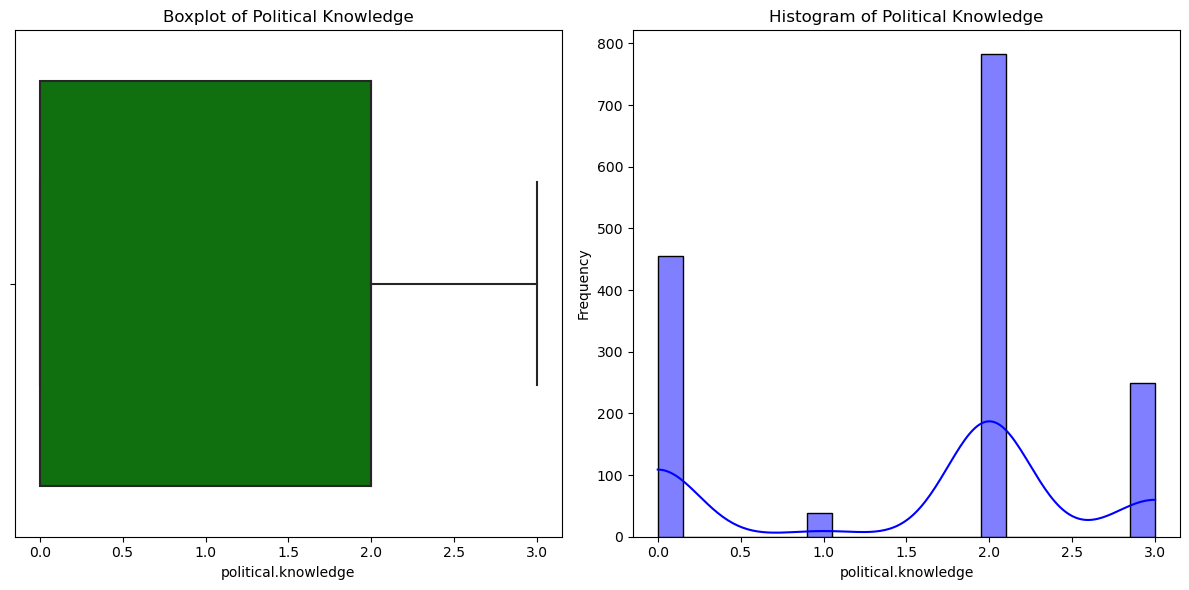

In [340]:

fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='political.knowledge', color='green', ax=display[0])
display[0].set_title('Boxplot of Political Knowledge')
display[0].set_xlabel('political.knowledge')

sns.histplot(df['political.knowledge'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Histogram of Political Knowledge')
display[1].set_xlabel('political.knowledge')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

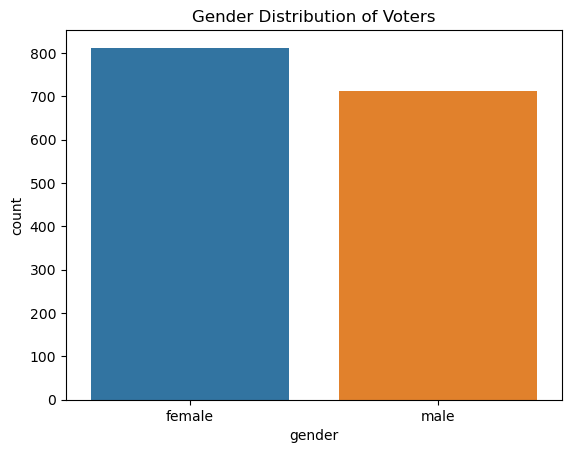

In [343]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Voters')
plt.show()

In [345]:
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df.corr()



,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Unnamed: 0,1.000000,0.005128,0.071882,0.035907,0.001602,0.000282,0.038218,0.002485
age,0.005128,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.071882,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,0.035907,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.001602,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.000282,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.038218,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,0.002485,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


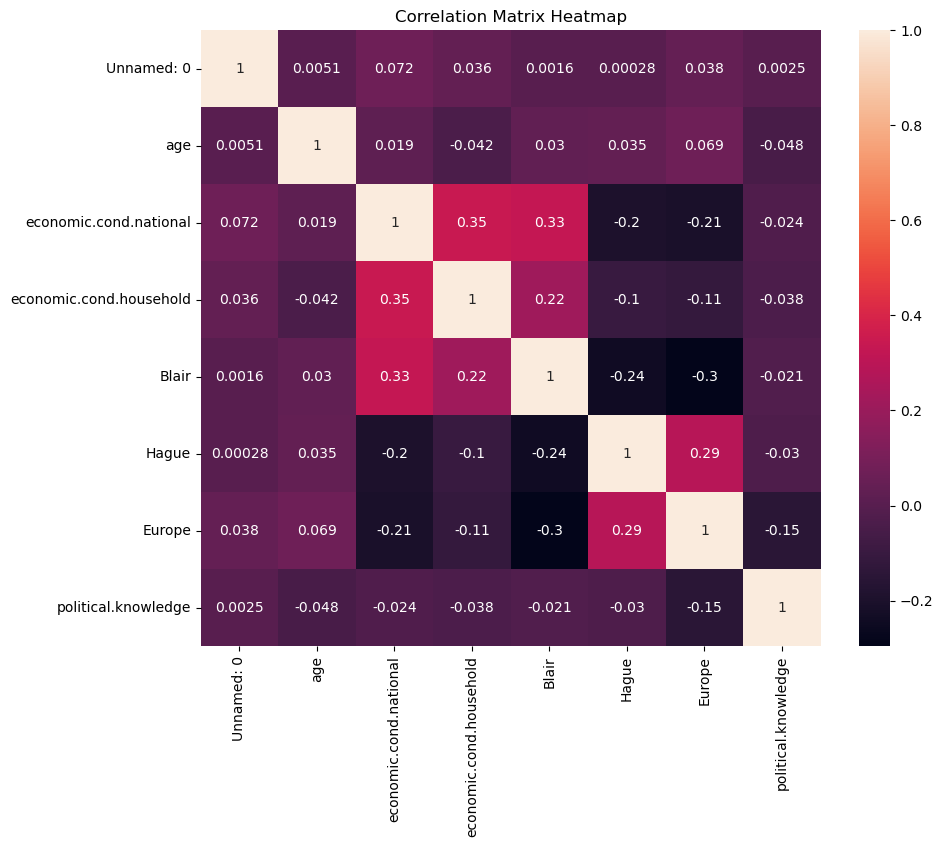

In [347]:
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [349]:
df=df.drop('Unnamed: 0', axis=1)

### Dropping the column 'Unnamed: 0' from the dataframe as it doesn;t serve any purpose or is not relevant 

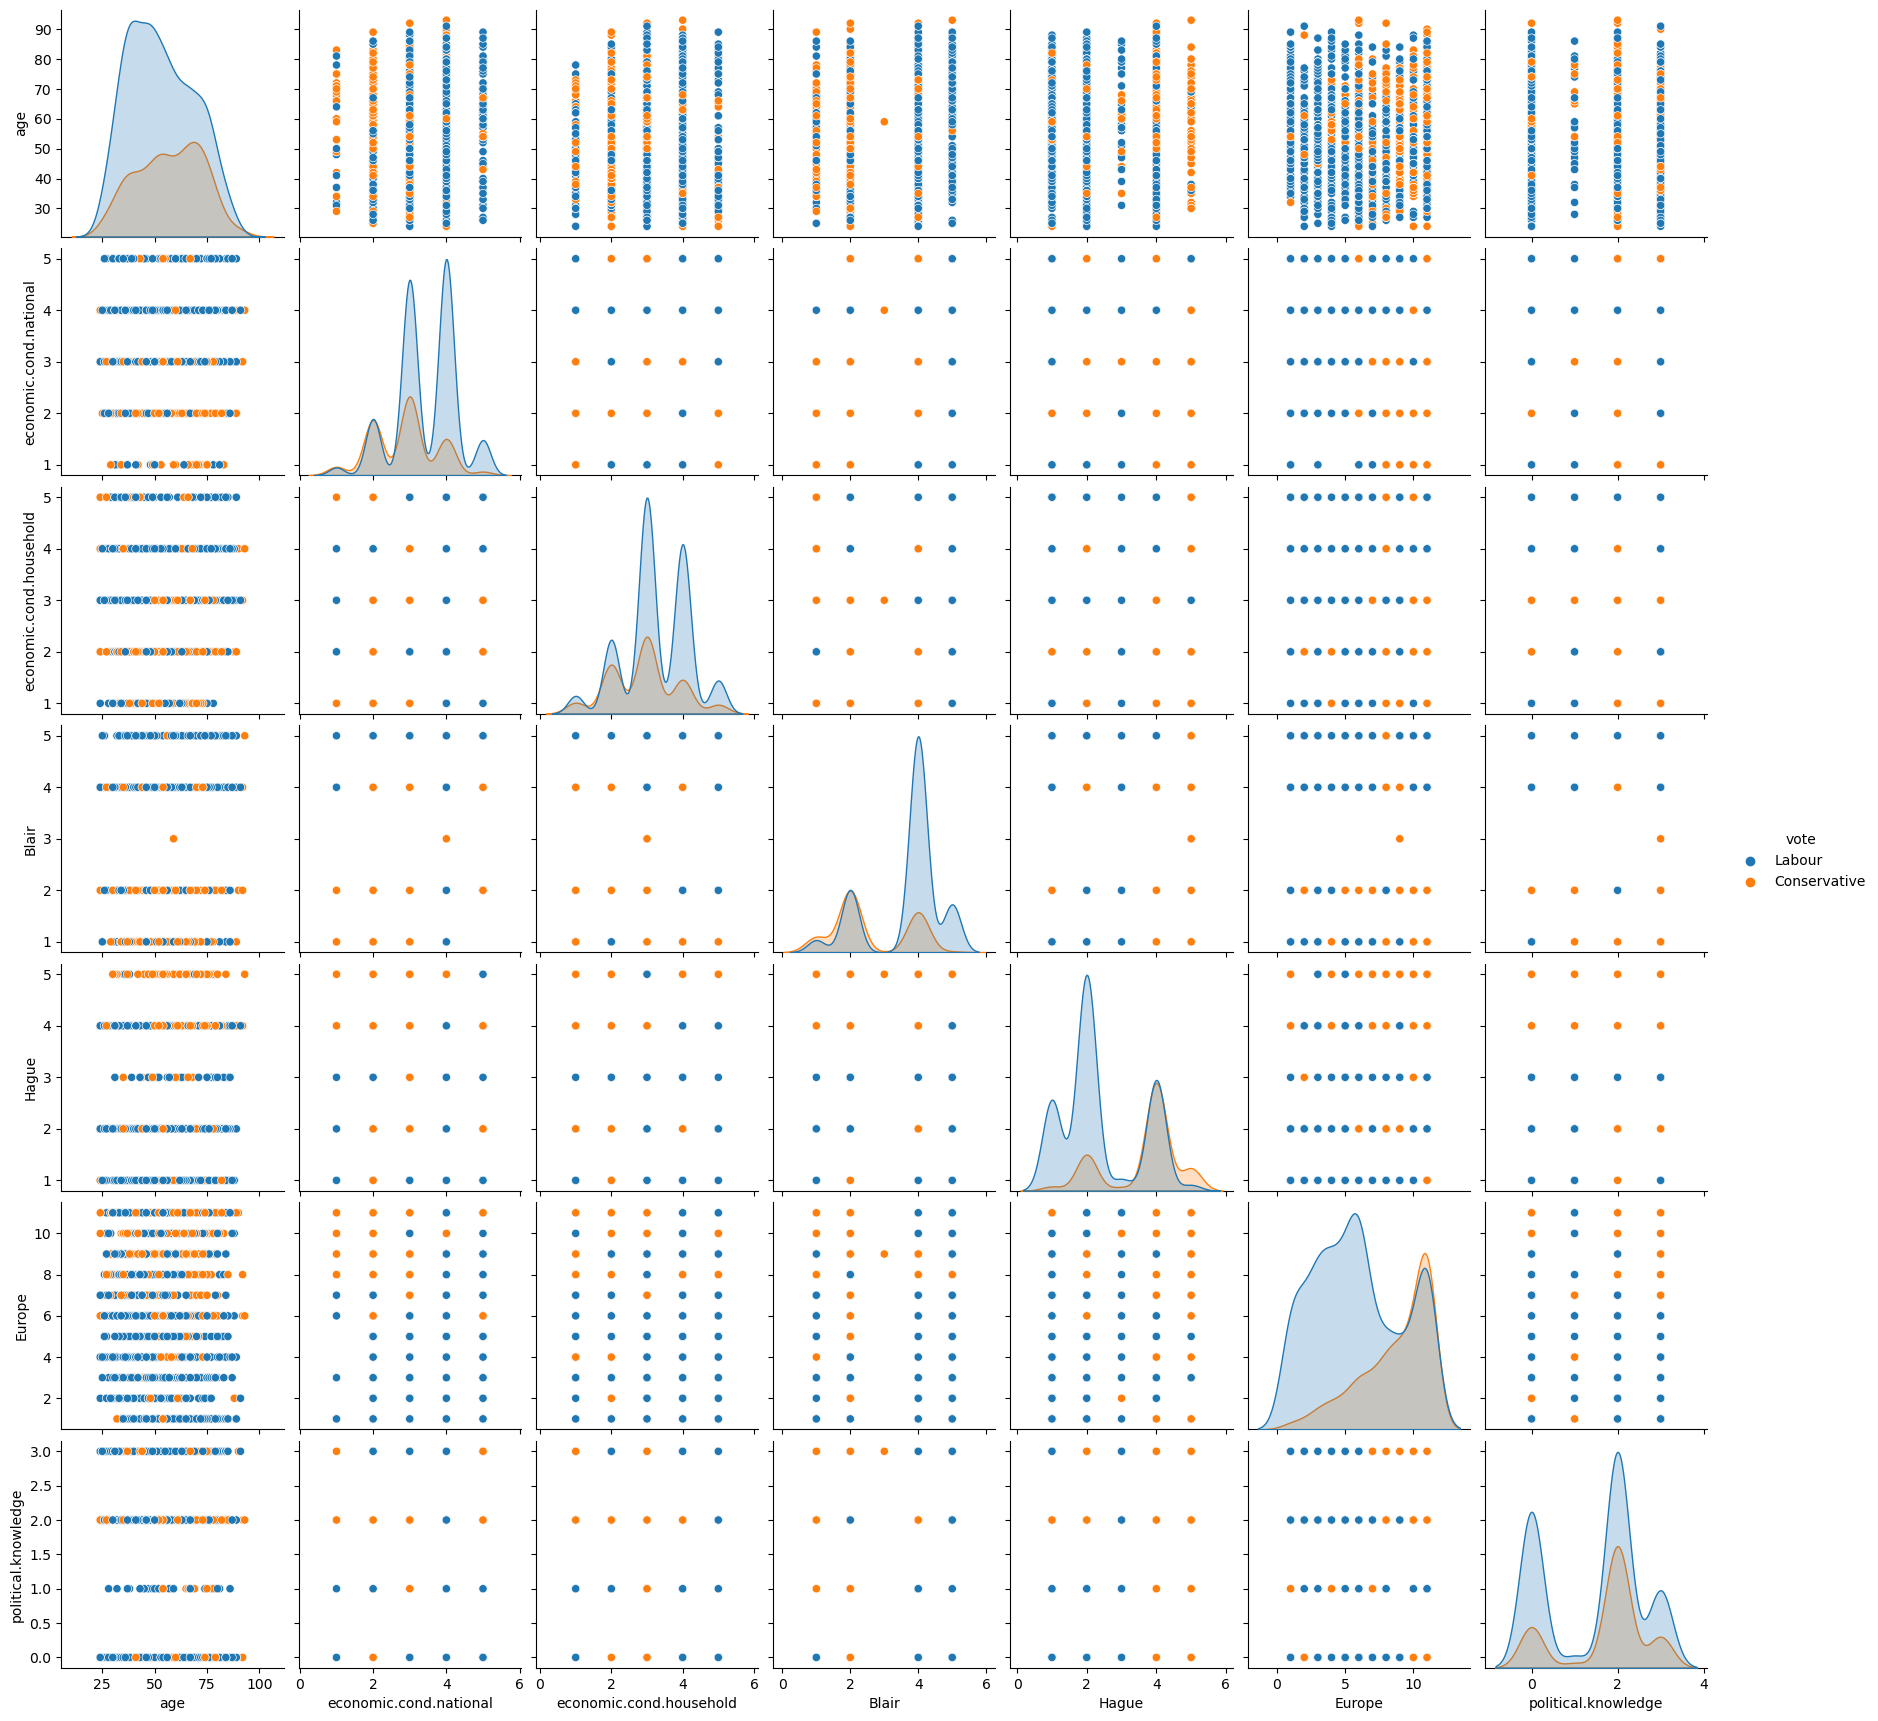

In [352]:
sns.pairplot(df, hue='vote')
plt.show()

### Brief analysis of the pairplot:

#### Age Distribution:

The age distribution shows that both Labour and Conservative voters are spread across a wide age range, but Labour voters seem to have a higher concentration in the younger age groups, while Conservative voters are more evenly spread across ages.

#### Economic Conditions (National and Household):
The economic.cond.national and economic.cond.household features appear to have a similar distribution across both Labour and Conservative voters, with no strong visible separation between the two groups.
However, there are some clusters in these features that could indicate a certain pattern, which might be worth further exploration.

#### Leader Perceptions (Blair and Hague):
The Blair and Hague features, representing perceptions of the leaders, show more noticeable differences between Labour and Conservative voters.
Labour voters generally rate Blair more positively, while Conservative voters tend to rate Hague higher, which aligns with expectations given their party affiliations.

#### Europe:
The Europe feature also shows some separation between Labour and Conservative voters, though it is less pronounced. This might suggest differing views on Europe between the two groups, but it's not as distinct as the leader perception features.

#### Political Knowledge:
The political.knowledge feature doesn't show a strong separation between Labour and Conservative voters. Both groups seem to be evenly distributed across different levels of political knowledge.

#### Overall Insights:
The most distinct separation between Labour and Conservative voters is seen in their perceptions of Blair and Hague.
Age and economic conditions show some patterns, but they are not as strongly differentiated.
Europe and political knowledge features are more evenly distributed across the two voter groups.

In [355]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

def treat_outliers_iqr(num_df):
    df_outliers = num_df.copy()

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for col in df_outliers.columns:
        df_outliers[col] = np.where(df_outliers[col] < lower_bound[col], lower_bound[col], df_outliers[col])
        df_outliers[col] = np.where(df_outliers[col] > upper_bound[col], upper_bound[col], df_outliers[col])

    return df_outliers

treated_num_df = treat_outliers_iqr(num_df)

outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))
outliers.sum()

Unnamed: 0                  0
age                         0
economic.cond.national     37
economic.cond.household    65
Blair                       0
Hague                       0
Europe                      0
political.knowledge         0
dtype: int64

In [357]:
outliers = ((treated_num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))
outliers.sum()

Unnamed: 0                 0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
dtype: int64

In [359]:
# Encode categorical variables using one-hot encoding for 'gender' and label encoding for 'vote'
df['vote'] = df['vote'].map({'Labour': 1, 'Conservative': 0})
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [361]:
# Split the data into training and testing sets
X = df.drop(columns=['vote'])
y = df['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [363]:
##Scaling the data using StandardScaler to normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [365]:
train_stats = X_train.describe().transpose()
test_stats = X_test.describe().transpose()
summary_stats = pd.concat([train_stats, test_stats], axis=1, keys=['Training Set', 'Testing Set'])
summary_stats = summary_stats.swaplevel(axis=1)
summary_stats

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
,Training Set,Training Set,Training Set,Training Set,Training Set,Training Set,Training Set,Training Set,Testing Set,Testing Set,Testing Set,Testing Set,Testing Set,Testing Set,Testing Set,Testing Set
age,1067.0,54.561387,15.804764,24.0,41.0,54.0,68.0,93.0,458.0,53.299127,15.472148,24.0,41.0,52.0,65.0,92.0
economic.cond.national,1067.0,3.264292,0.894778,1.0,3.0,3.0,4.0,5.0,458.0,3.203057,0.847336,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1067.0,3.145267,0.926210,1.0,3.0,3.0,4.0,5.0,458.0,3.128821,0.939528,1.0,3.0,3.0,4.0,5.0
Blair,1067.0,3.353327,1.174221,1.0,2.0,4.0,4.0,5.0,458.0,3.290393,1.176333,1.0,2.0,4.0,4.0,5.0
Hague,1067.0,2.763824,1.226078,1.0,2.0,2.0,4.0,5.0,458.0,2.707424,1.241862,1.0,2.0,2.0,4.0,5.0
Europe,1067.0,6.680412,3.304443,1.0,4.0,6.0,10.0,11.0,458.0,6.840611,3.282259,1.0,4.0,7.0,10.0,11.0
political.knowledge,1067.0,1.561387,1.065724,0.0,0.0,2.0,2.0,3.0,458.0,1.497817,1.123158,0.0,0.0,2.0,2.0,3.0


#### KNN and Naive Bayes benefit from scaling because they rely on distance metrics or probability calculations that assume normally distributed data.
#### Bagging and Boosting models (like Random Forest or XGBoost) do not require scaling, but scaling won't hurt their performance either.
#### If we skip scaling,it might negatively impact the performance of models like KNN.

### KNN Model

In [369]:

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Evaluation on Training Data
print("KNN")
print("Train Data")
y_train_pred = knn.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

KNN
Train Data
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067

Confusion Matrix:
 [[248  84]
 [ 62 673]]


In [371]:
# Evaluation on Test Data
print("\nTest Data")
y_test_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Data
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       130
           1       0.88      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

Confusion Matrix:
 [[ 92  38]
 [ 42 286]]


ROC-AUC Score: 0.8705558161350845


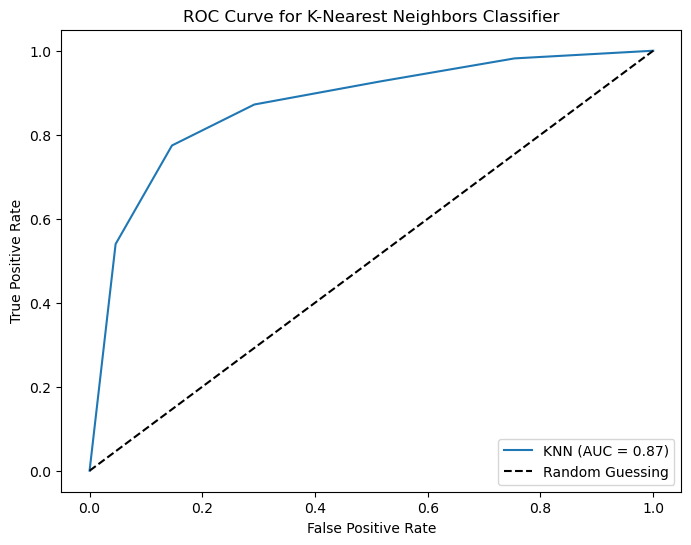

In [400]:
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors Classifier')
plt.legend(loc='lower right')
plt.show()

### Key Observations:

#### Training Data:

* The KNN model performs well on the training data with an overall accuracy of 86%.
* The recall is slightly lower for Class 0 (Labour) compared to Class 1 (Conservative), indicating that the model is slightly less effective at identifying all Labour voters.

#### Test Data:

* The accuracy on the test data is 83%, which is slightly lower than on the training data, suggesting some generalization but not significant overfitting.
* The precision and recall for Class 1 (Conservative) are notably higher than for Class 0 (Labour), indicating that the model is better at predicting Conservative voters.
* The model has a tendency to misclassify some Labour voters as Conservative (as seen in the confusion matrix with 38 false positives in the test data).

### Naive Bayes Model

In [377]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Evaluation on Training Data
print("Naive Bayes")
print("Train Data")
y_train_pred = nb.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Naive Bayes
Train Data
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Confusion Matrix:
 [[240  92]
 [ 86 649]]


In [379]:
# Evaluation on Test Data
print("\nTest Data")
y_test_pred = nb.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Data
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

Confusion Matrix:
 [[ 94  36]
 [ 44 284]]


ROC-AUC Score: 0.8845450281425891


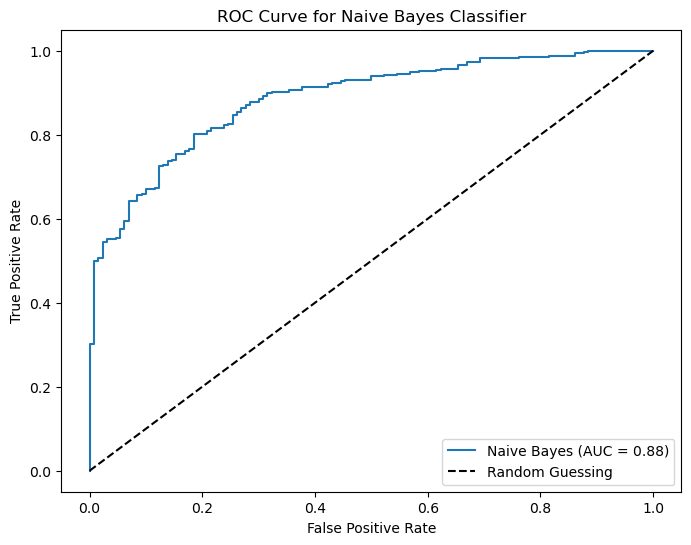

In [398]:
y_test_prob = nb.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()



### Key Observations:

#### Training Data:

* The Naive Bayes model achieves an accuracy of 83% on the training data.
* The recall for both classes is equal at 88%, indicating the model's consistency in identifying true positives for both Labour and Conservative voters.
* Precision for Class 0 (Labour) is slightly lower at 0.74, reflecting some misclassification as Conservative voters.

#### Test Data:

* The model maintains an accuracy of 83% on the test data, showing good generalization.
* Similar to the training data, the model is better at predicting Conservative voters, with higher precision and recall for Class 1.
* The model has a comparable performance for Labour voters on the test data, with slightly better recall (0.72) than precision (0.68).

#### Comparison with KNN:
Both models achieve the same overall accuracy on the test data (83%).
KNN shows slightly higher precision and recall for Class 1 (Conservative) on both training and test data, making it marginally better at predicting Conservative voters.
Naive Bayes performs similarly but with a more balanced recall for Labour voters compared to KNN, although its precision for Labour voters is slightly lower.

### Bagging Model

In [383]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train_scaled, y_train)

# Evaluate on Training Data
print("Bagging")
print("Train Data")
y_train_pred = bagging.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Bagging
Train Data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       332
           1       0.99      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067

Confusion Matrix:
 [[328   4]
 [ 14 721]]


In [385]:
# Evaluate on Test Data
print("\nTest Data")
y_test_pred = bagging.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Data
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       130
           1       0.88      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.82       458

Confusion Matrix:
 [[ 91  39]
 [ 46 282]]


ROC-AUC Score: 0.861890243902439


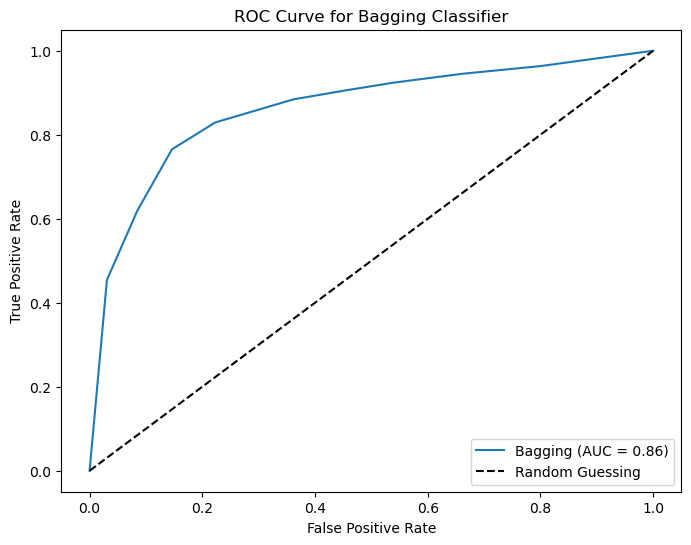

In [387]:
y_test_prob = bagging.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Classifier')
plt.legend(loc='lower right')
plt.show()

### Key Observations:

#### Training Data:

* The Bagging model exhibits near-perfect performance on the training data with an accuracy of 98%.
* The precision, recall, and F1-score for both classes are extremely high, indicating that the model is effectively learning from the training data with very few misclassifications.
* The low error in the confusion matrix suggests the model might be overfitting to the training data.

#### Test Data:

* The model's accuracy drops to 81% on the test data, a notable decrease compared to its training performance, indicating potential overfitting.
* Precision and recall for Class 1 (Conservative) are still relatively high, but there is a noticeable drop in the model's ability to predict Class 0 (Labour) accurately, with lower precision (0.66) and recall (0.70).
* The model shows a higher number of false negatives and false positives for both classes compared to the training data, further supporting the overfitting concern.

#### Comparison with KNN and Naive Bayes:
Bagging achieves superior performance on the training data, but this comes at the cost of overfitting, as evidenced by the drop in test accuracy.
KNN and Naive Bayes exhibit more consistent performance across both training and test data, with KNN slightly outperforming in precision and recall for Conservative voters.
Bagging does not provide a significant advantage over KNN and Naive Bayes in test data performance, making the latter two more reliable for generalization.

### Boosting Model

In [220]:

boosting = GradientBoostingClassifier(random_state=1)
boosting.fit(X_train_scaled, y_train)

# Evaluation on Training Data
print("Boosting")
print("Train Data")
y_train_pred = boosting.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))


Boosting
Train Data
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067

Confusion Matrix:
 [[262  70]
 [ 51 684]]


In [222]:
# Evaluation on Test Data
print("\nTest Data")
y_test_pred = boosting.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Data
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458

Confusion Matrix:
 [[ 96  34]
 [ 43 285]]


ROC-AUC Score: 0.9041041275797373


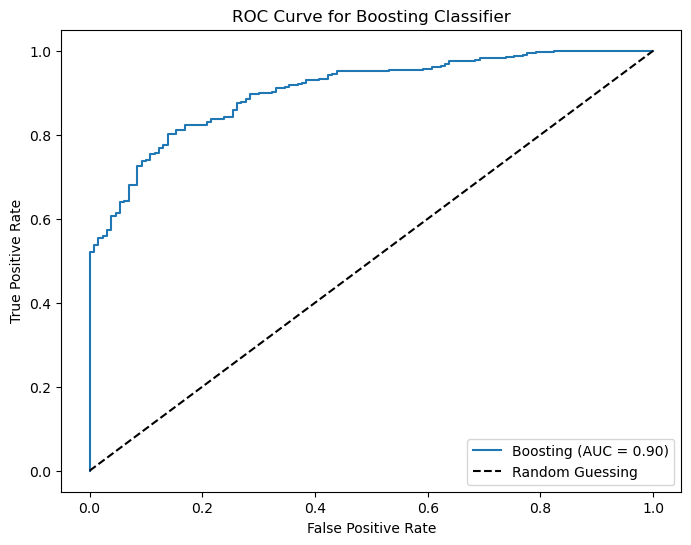

In [392]:

y_test_prob = boosting.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Boosting Classifier')
plt.legend(loc='lower right')
plt.show()


### Key Observations:

#### Training Data:

* The Boosting model achieves a solid accuracy of 89% on the training data, indicating that it is effective in learning from the data.
* Precision and recall are high for both classes, particularly for Class 1 (Conservative), where the model exhibits strong performance.
* The confusion matrix shows a moderate number of false positives and false negatives, suggesting that while the model is well-calibrated, there is still room for improvement.

#### Test Data:

* The model maintains an accuracy of 83% on the test data, consistent with its performance on the training data, indicating that the model generalizes well.
* Precision, recall, and F1-scores remain strong, particularly for Class 1 (Conservative), where the model performs consistently well.
* The confusion matrix reveals a slightly higher number of false negatives and positives compared to the training data, but the performance remains robust overall.

#### Comparison with Other Models:
* Boosting provides a balanced and strong performance, with good generalization from the training data to the test data, similar to KNN and Naive Bayes but with slightly higher overall accuracy.
* KNN and Naive Bayes show slightly lower accuracy but more consistent recall for Class 0 (Labour).
* Bagging demonstrated strong training performance but suffered from overfitting, making Boosting a better choice for this dataset.

### Conclusion:

Boosting demonstrates strong and consistent performance on both training and test data, making it a reliable choice for this classification task. It balances the trade-off between precision and recall well, particularly for Conservative voters, while still performing adequately for Labour voters. Given its robust performance, Boosting may be a preferable model, especially when seeking to avoid the overfitting observed with Bagging.

In [402]:

# Tuning Bagging model
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}
grid_bagging = GridSearchCV(BaggingClassifier(random_state=1), param_grid_bagging, cv=5, scoring='roc_auc')
grid_bagging.fit(X_train_scaled, y_train)

# Tuning Boosting model
param_grid_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_boosting = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid_boosting, cv=5, scoring='roc_auc')
grid_boosting.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Bagging:", grid_bagging.best_params_)
print("Best parameters for Boosting:", grid_boosting.best_params_)

# Best model evaluation
best_bagging = grid_bagging.best_estimator_
best_boosting = grid_boosting.best_estimator_

# Repeat evaluation steps (classification report, confusion matrix, ROC-AUC)


Best parameters for Bagging: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}
Best parameters for Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [403]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Predict probabilities for Bagging model
y_test_prob_bagging = best_bagging.predict_proba(X_test_scaled)[:, 1]
roc_auc_bagging = roc_auc_score(y_test, y_test_prob_bagging)

# Predict probabilities for Boosting model
y_test_prob_boosting = best_boosting.predict_proba(X_test_scaled)[:, 1]
roc_auc_boosting = roc_auc_score(y_test, y_test_prob_boosting)

# Print ROC-AUC Scores
print(f"ROC-AUC Score for Bagging: {roc_auc_bagging:.2f}")
print(f"ROC-AUC Score for Boosting: {roc_auc_boosting:.2f}")

# Predictions and Evaluation for Bagging model
y_train_pred_bagging = best_bagging.predict(X_train_scaled)
y_test_pred_bagging = best_bagging.predict(X_test_scaled)

print("Classification Report for Bagging - Train Data:")
print(classification_report(y_train, y_train_pred_bagging))
print("Confusion Matrix for Bagging - Train Data:\n", confusion_matrix(y_train, y_train_pred_bagging))

print("Classification Report for Bagging - Test Data:")
print(classification_report(y_test, y_test_pred_bagging))
print("Confusion Matrix for Bagging - Test Data:\n", confusion_matrix(y_test, y_test_pred_bagging))

# Predictions and Evaluation for Boosting model
y_train_pred_boosting = best_boosting.predict(X_train_scaled)
y_test_pred_boosting = best_boosting.predict(X_test_scaled)

print("Classification Report for Boosting - Train Data:")
print(classification_report(y_train, y_train_pred_boosting))
print("Confusion Matrix for Boosting - Train Data:\n", confusion_matrix(y_train, y_train_pred_boosting))

print("Classification Report for Boosting - Test Data:")
print(classification_report(y_test, y_test_pred_boosting))
print("Confusion Matrix for Boosting - Test Data:\n", confusion_matrix(y_test, y_test_pred_boosting))

# Select the final model based on ROC-AUC Score
if roc_auc_bagging > roc_auc_boosting:
    print("Bagging model is preferred based on ROC-AUC Score.")
else:
    print("Boosting model is preferred based on ROC-AUC Score.")


ROC-AUC Score for Bagging: 0.89
ROC-AUC Score for Boosting: 0.91
Classification Report for Bagging - Train Data:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       332
           1       0.92      0.99      0.95       735

    accuracy                           0.93      1067
   macro avg       0.94      0.90      0.92      1067
weighted avg       0.94      0.93      0.93      1067

Confusion Matrix for Bagging - Train Data:
 [[271  61]
 [ 10 725]]
Classification Report for Bagging - Test Data:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       130
           1       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.74      0.75       458
weighted avg       0.80      0.81      0.80       458

Confusion Matrix for Bagging - Test Data:
 [[ 74  56]
 [ 31 297]]
Classification Report for Boosting - Train Data:
    

## Notes 
## Final Model Selection
### Model Comparison

#### ROC-AUC Scores

* Bagging: 0.89
* Boosting: 0.91
* Naive Bayes: 0.88 
* KNN: 0.89 

#### Classification Report & Confusion Matrix

* Naive Bayes
Train Data Accuracy: 83%
Test Data Accuracy: 83%
Strength: Simplicity and good performance on Class 1.
Weakness: Lower performance for Class 0, especially on test data.

* K-Nearest Neighbors (KNN)
Train Data Accuracy: 86%
Test Data Accuracy: 83%
Strength: Good overall accuracy and precision for Class 1.
Weakness: Lower recall for Class 0, indicating potential issues in identifying all relevant cases.

* Bagging
Train Data Accuracy: 98%
Test Data Accuracy: 81%
Strength: High accuracy on training data and effective at identifying Class 1.
Weakness: Significant performance drop on test data, particularly in recall for Class 0.

* Boosting
Train Data Accuracy: 89%
Test Data Accuracy: 83%
Strength: Good balance of precision and recall for both classes, consistent performance across train and test data.
Weakness: Slightly lower precision for Class 0 compared to Bagging.

#### Final Model Selection
Selected Model: Boosting

#### Justification:

* Highest ROC-AUC Score: Boosting has the highest ROC-AUC score of 0.91, indicating the best performance in distinguishing between classes.
* Balanced Precision and Recall: Boosting provides a good balance of precision and recall for both classes, making it reliable in various scenarios.
* Consistency Across Data: It maintains consistent performance on both training and test datasets, reducing the risk of overfitting and ensuring good generalization.

#### Considerations:
Bagging shows high training accuracy but suffers from a drop in test accuracy, suggesting overfitting. It may not generalize well to new, unseen data.
Naive Bayes and KNN have lower ROC-AUC scores compared to Boosting and show less balanced performance.

In [230]:
#the feature importances for the final model 
if isinstance(best_boosting, GradientBoostingClassifier):
    importances = best_boosting.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)


                   Feature  Importance
4                    Hague    0.369035
5                   Europe    0.191904
3                    Blair    0.187477
6      political.knowledge    0.111058
0                      age    0.087185
1   economic.cond.national    0.033154
2  economic.cond.household    0.018543
7              gender_male    0.001644


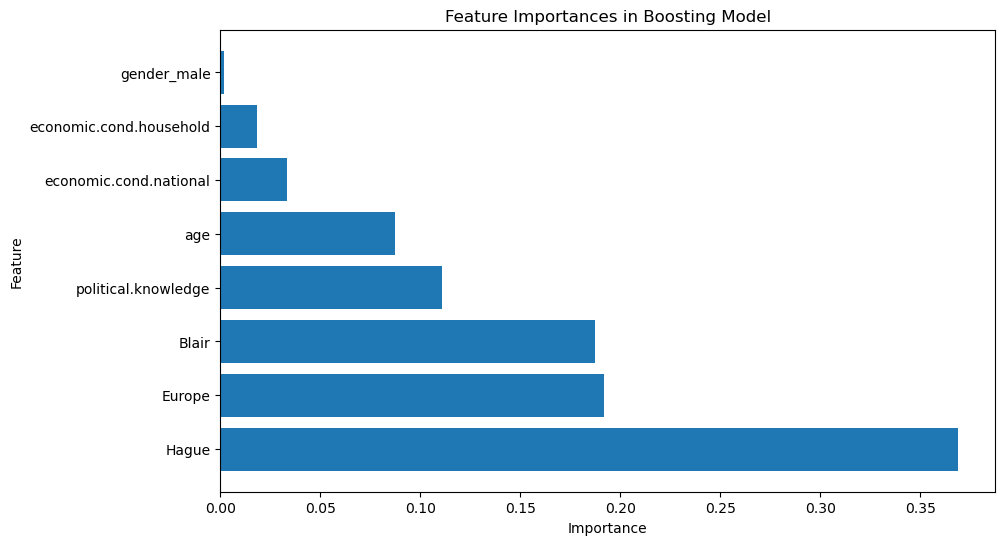

In [232]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Boosting Model')
plt.show()

# Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America and identify the most common words used in these speeches

* President Franklin D. Roosevelt in 1941
* President John F. Kennedy in 1961
* President Richard Nixon in 1973

In [72]:
import re 
import nltk
import string
Project_Speech = pd.read_excel("Project_Speech.xlsx")

In [74]:
Project_Speech.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [76]:
Project_Speech.columns

Index(['Name', 'Speech'], dtype='object')

In [78]:
# Calculate number of characters
Project_Speech['Num_Chars'] = Project_Speech['Speech'].apply(len)

# Display the results
print(Project_Speech[['Name', 'Num_Chars']])


        Name  Num_Chars
0  Roosevelt       7651
1    Kennedy       7673
2      Nixon      10106


In [80]:
from nltk.tokenize import word_tokenize

# Calculate number of words
Project_Speech['Num_Words'] = Project_Speech['Speech'].apply(lambda x: len(word_tokenize(x)))

# Display the results
print(Project_Speech[['Name', 'Num_Words']])


        Name  Num_Words
0  Roosevelt       1453
1    Kennedy       1494
2      Nixon       1913


In [82]:

# Calculate number of sentences
Project_Speech['Num_Sentences'] = Project_Speech['Speech'].apply(lambda x: len(sent_tokenize(x)))

# Display the results
print(Project_Speech[['Name', 'Num_Sentences']])


        Name  Num_Sentences
0  Roosevelt             32
1    Kennedy             27
2      Nixon             20


In [84]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Project_Speech['stopwords'] = Project_Speech['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
Project_Speech[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [126]:
stop_words = set(stopwords.words('english'))

filtered_words = [word.lower() for word in ' '.join(Project_Speech['Speech']).split()
    if word.lower() not in stop_words and word.isalnum()]

filtered_words[:10]

['national',
 'day',
 'inauguration',
 'since',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'day']

In [128]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words[:10]

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'day']

In [130]:
words_df = pd.DataFrame(stemmed_words, columns=['words'])
common_words = words_df['words'].value_counts().head(10)
common_words

words
us         44
new        26
let        25
nation     24
america    16
year       14
shall      13
peac       13
know       13
peopl      13
Name: count, dtype: int64

In [120]:
Project_Speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           3 non-null      object
 1   Speech         3 non-null      object
 2   Num_Chars      3 non-null      int64 
 3   Num_Words      3 non-null      int64 
 4   Num_Sentences  3 non-null      int64 
 5   stopwords      3 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 276.0+ bytes


##### Combine the stemmed words into a single string

In [133]:
comb_speech_text = ' '.join(stemmed_words)

In [254]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=3000, height=3000, background_color='black', min_font_size = 10, random_state=100).generate(comb_speech_text)

Word Cloud for Project_Speech (after cleaning)!!


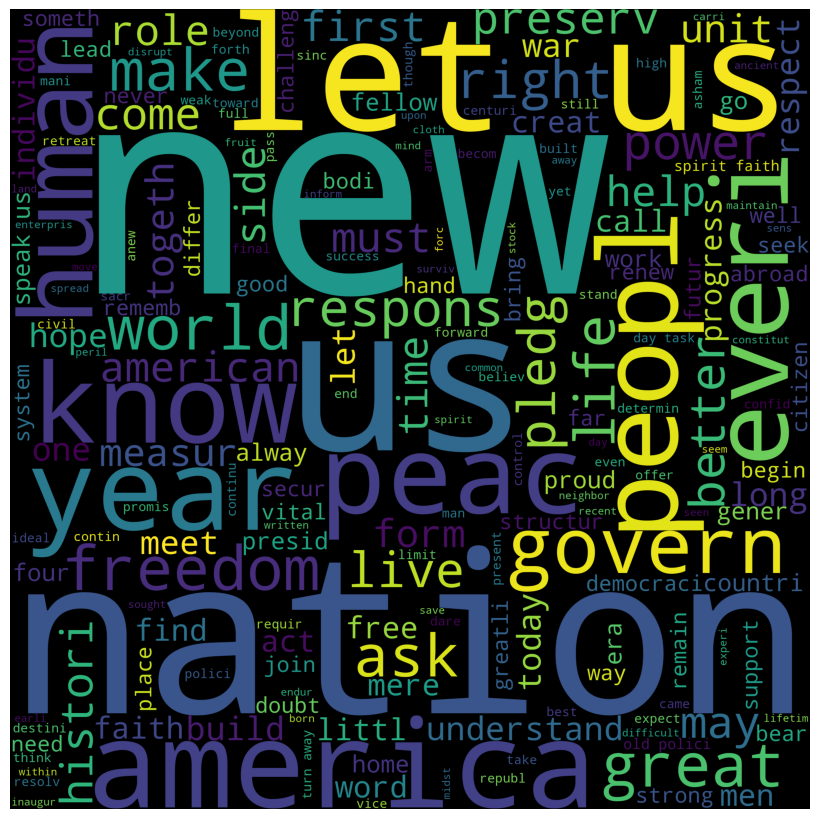

In [258]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Project_Speech (after cleaning)!!")
plt.show()

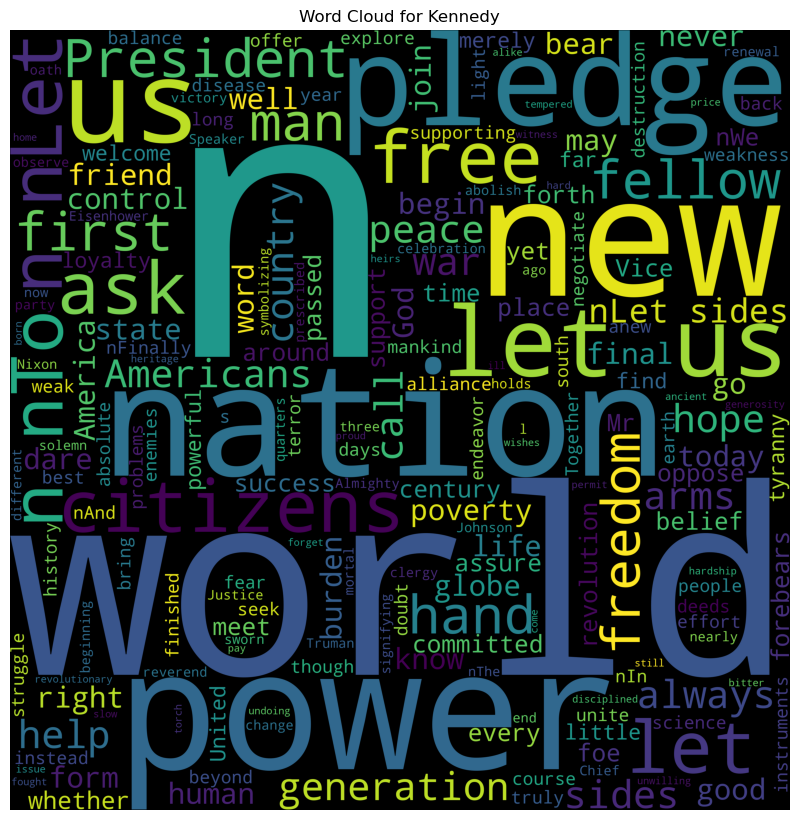

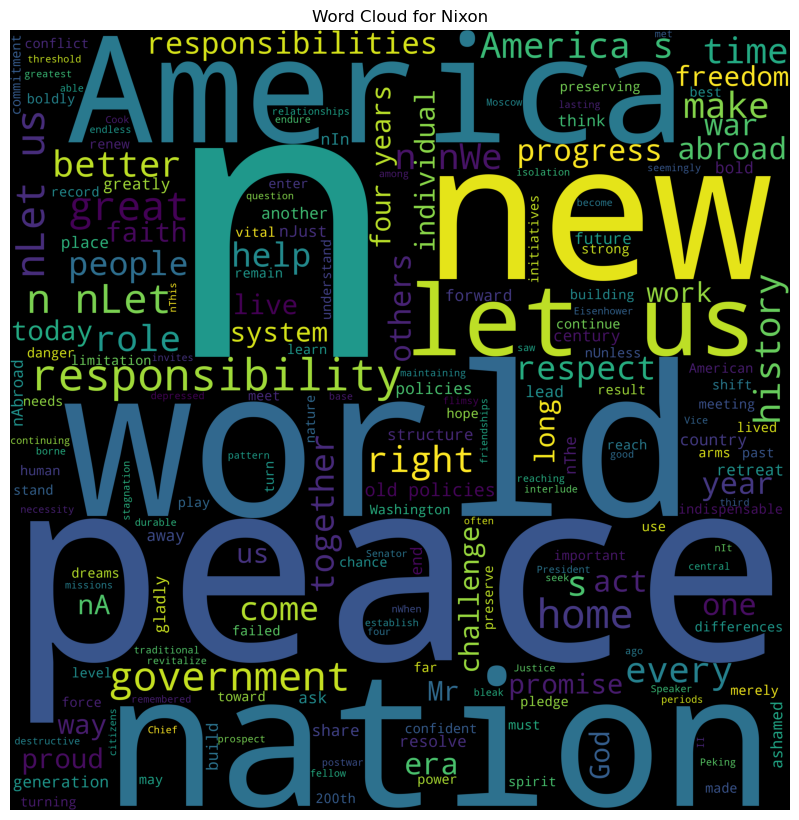

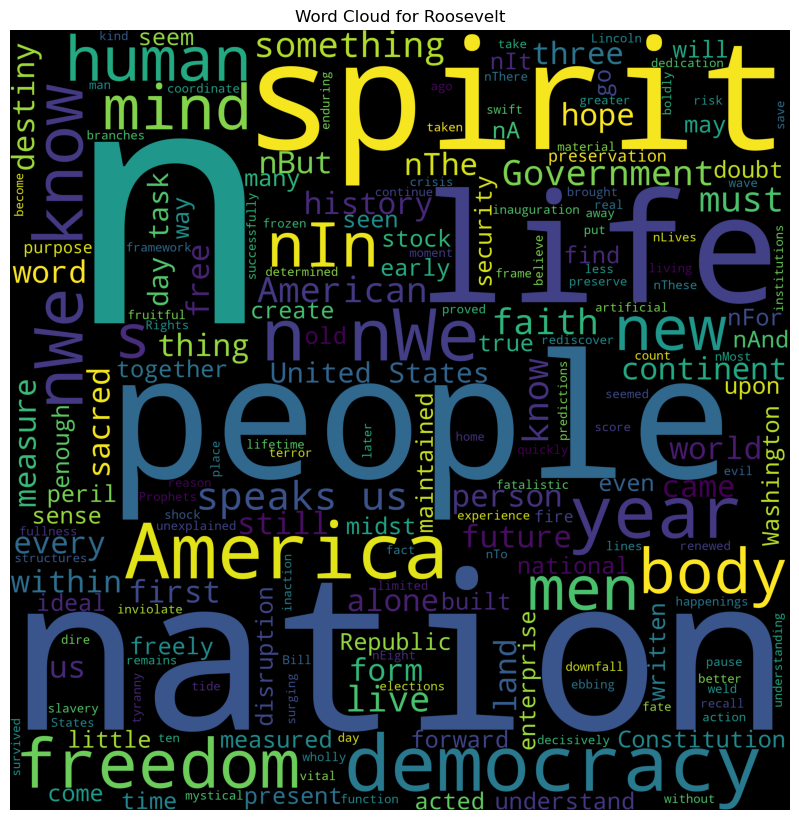

In [248]:

# Generate word clouds for each speech
for name, group in Project_Speech.groupby('Name'):
    speech_text = ' '.join(group['Speech'])  
    
    wordcloud = WordCloud(
        width=3000, 
        height=3000, 
        background_color='black', 
        min_font_size=10, 
        random_state=100
    ).generate(speech_text)

    # Plot the WordCloud image                        
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word Cloud for {name}")
    plt.tight_layout(pad=0)

    plt.show()


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx